## 6.1. Neural Network with a Single Output

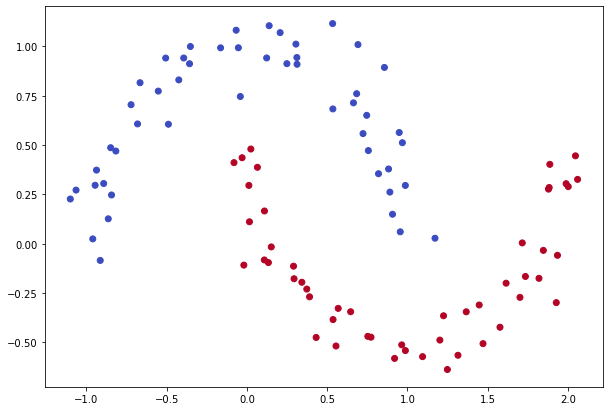

In [1]:
from sklearn import datasets  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline  

np.random.seed(0)  
X, y = datasets.make_moons(100, noise=0.10)  
x1 = X[:,0]  
x2 = X[:,1]  

plt.figure(figsize=(10,7))  
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)  

In [2]:
y = y.reshape(y.shape[0],1)  

In [3]:
print(X.shape)  
print(y.shape)  


(100, 2)
(100, 1)


In [4]:
def define_parameters(weights):  
    weight_list = []  
    bias_list = []  
    for i in range(len(weights) - 1):  

        w = np.random.randn(weights[i], weights[i+1])  
        b = np.random.randn()  

        weight_list.append(w)  
        bias_list.append(b)  

    return weight_list, bias_list  

In [5]:
def sigmoid(x):  
    return 1/(1+np.exp(-x))  

In [6]:
def sigmoid_der(x):  
    return sigmoid(x)*(1-sigmoid(x))  

In [7]:
def predictions(w, b, X):  
    zh = np.dot(X,w[0]) + b[0]  
    ah = sigmoid(zh)  

    zo = np.dot(ah, w[1]) + b[1]  
    ao = sigmoid(zo)  
    return ao  

In [8]:
def find_cost(ao,y):  
    m = y.shape[0]  
    total_cost = (1/m) * np.sum(np.square(ao - y))  
    return total_cost  

In [9]:
def find_derivatives(w, b, X):  

    zh = np.dot(X,w[0]) + b[0]  
    ah = sigmoid(zh)  

    zo = np.dot(ah, w[1]) + b[1]  
    ao = sigmoid(zo)  

    # Back propagation phase 1  
    m = y.shape[0]  
    dcost_dao = (1/m)*(ao-y)  
    dao_dzo = sigmoid_der(zo)  
    dzo_dwo = ah.T  

    dwo =  np.dot(dzo_dwo, dcost_dao * dao_dzo)  
    dbo = np.sum(dcost_dao * dao_dzo)  

    # Back propagation phase 2  

    # dcost_wh = dcost_dah * dah_dzh * dzh_dwh  
    # dcost_dah = dcost_dzo * dzo_dah  

    dcost_dzo = dcost_dao * dao_dzo  
    dzo_dah = w[1].T  

    dcost_dah = np.dot(dcost_dzo ,  dzo_dah)  

    dah_dzh = sigmoid_der(zh)   
    dzh_dwh = X.T  
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)  
    dbh = np.sum(dah_dzh * dcost_dah)  

    return dwh, dbh, dwo, dbo  

In [10]:
def update_weights(w,b,dwh, dbh, dwo, dbo, lr):  
    w[0] = w[0] - lr * dwh  
    w[1] = w[1] - lr * dwo  

    b[0] = b[0] - lr * dbh  
    b[1] = b[1] - lr * dbo  

    return w, b  


In [11]:
def my_neural_network(X, y, lr, epochs):  
    error_list = []  
    input_len = X.shape[1]  
    output_len = y.shape[1]  
    w,b = define_parameters([input_len, 4, output_len])  

    for i in range(epochs):  
        ao = predictions(w, b, X)  
        cost = find_cost(ao, y)  
        error_list.append(cost)  
        dwh, dbh, dwo, dbo = find_derivatives (w, b, X)  
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo,  lr )  
        if i % 50 == 0 :  
            print(cost)  

    return w, b, error_list 

In [12]:
lr = 0.5  
epochs = 2000  
w, b, error_list = my_neural_network(X,y,lr,epochs)  


0.420576773526906
0.1465387851789338
0.12617746238650168
0.11570597079471208
0.10850813272509596
0.10337608010852294
0.09958560452217739
0.09670335366165751
0.09446206947265266
0.0926891984440786
0.09126791271989423
0.09011580416073578
0.08917288078317867
0.0883944589996478
0.08774670296567842
0.08720366848471853
0.08674525781893186
0.08635576132720636
0.08602279652438301
0.08573652577983962
0.08548907373090577
0.08527408984725415
0.08508641749767577
0.08492184175007911
0.08477689577303969
0.08464871114727117
0.08453490130214524
0.08443347011357043
0.08434273974659046
0.08426129331873805
0.08418792905445392
0.08412162340775241
0.08406150122892356
0.08400681149799512
0.08395690748351937
0.08391123043924369
0.0838692961445392
0.08383068374251368
0.08379502644380786
0.08376200375248426


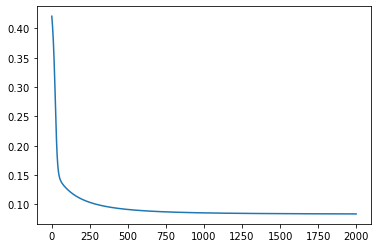

In [13]:
plt.plot(error_list)  

## 6.2. Neural Network with Multiple Outputs

In [15]:
import numpy as np  
import matplotlib.pyplot as plt  

np.random.seed(42)  

cat1 = np.random.randn(800, 2) + np.array([0, -3])  
cat2 = np.random.randn(800, 2) + np.array([3, 3])  
cat3 = np.random.randn(800, 2) + np.array([-3, 3])  

X = np.vstack([cat1, cat2, cat3])  

labels = np.array([0]*800 + [1]*800 + [2]*800)  

y = np.zeros((2400, 3))  

for i in range(2400):  
    y[i, labels[i]] = 1  

In [16]:
print(X.shape)  
print(y.shape)  

(2400, 2)
(2400, 3)


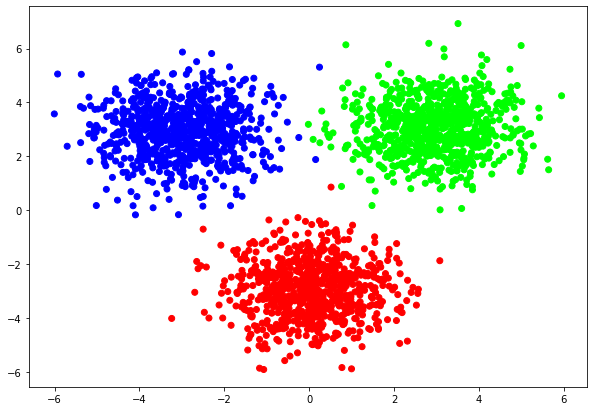

In [17]:
x1 = X[:,0]  
x2 = X[:,1]  

plt.figure(figsize=(10,7))  
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm) 


In [19]:
import numpy as np  
import matplotlib.pyplot as plt  

np.random.seed(42)  

cat1 = np.random.randn(800, 2) + np.array([0, -3])  
cat2 = np.random.randn(800, 2) + np.array([3, 3])  
cat3 = np.random.randn(800, 2) + np.array([-3, 3])  


X = np.vstack([cat1, cat2, cat3])  

labels = np.array([0]*800 + [1]*800 + [2]*800)  

y = np.zeros((2400, 3))  

for i in range(2400):  
   y[i, labels[i]] = 1  


def define_parameters(weights):  
    weight_list = []  
    bias_list = []  
    for i in range(len(weights) - 1):  

        w = np.random.randn(weights[i], weights[i+1])  
        b = np.random.randn()  

        weight_list.append(w)  
        bias_list.append(b)  

    return weight_list, bias_list  

def softmax(X):  
    expX = np.exp(X)  
    return expX / expX.sum(axis=1, keepdims=True)  

def sigmoid(x):  
    return 1/(1+np.exp(-x))  


def sigmoid_der(x):  
    return sigmoid(x)*(1-sigmoid(x))  


def predictions(w, b, X):  
    zh = np.dot(X,w[0]) + b[0]  
    ah = sigmoid(zh)  

    zo = np.dot(ah, w[1]) + b[1]  
    ao = softmax(zo)  
    return ao  


def find_cost(ao,y):  

    total_cost = np.sum(-y * np.log(ao))  
    return total_cost  

def find_derivatives(w, b, X):  

    zh = np.dot(X,w[0]) + b[0]  
    ah = sigmoid(zh)  

    zo = np.dot(ah, w[1]) + b[1]  
    ao = softmax(zo)  

    # Back propagation phase 1  


    dcost_dzo = (ao-y)  
    dzo_dwo = ah.T  

    dwo =  np.dot(dzo_dwo,  dcost_dzo)  
    dbo = np.sum(dcost_dzo)  

    # Back propagation phase 2  

    # dcost_wh = dcost_dah * dah_dzh * dzh_dwh  
    # dcost_dah = dcost_dzo * dzo_dah  


    dzo_dah = w[1].T  

    dcost_dah = np.dot(dcost_dzo ,  dzo_dah)  

    dah_dzh = sigmoid_der(zh)   
    dzh_dwh = X.T  
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)  
    dbh = np.sum(dah_dzh * dcost_dah)  

    return dwh, dbh, dwo, dbo  

def update_weights(w,b,dwh, dbh, dwo, dbo, lr):  
    w[0] = w[0] - lr * dwh  
    w[1] = w[1] - lr * dwo  

    b[0] = b[0] - lr * dbh  
    b[1] = b[1] - lr * dbo  

    return w, b  

def my_multiout_neural_network(X, y, lr, epochs):  
    error_list = []  
    input_len = X.shape[1]  
    output_len = y.shape[1]  
    w,b = define_parameters([input_len, 4, output_len])  

    for i in range(epochs):  
        ao = predictions(w, b, X)  
        cost = find_cost(ao, y)  
        error_list.append(cost)  
        dwh, dbh, dwo, dbo = find_derivatives (w, b, X)  
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo,  lr )  
        if i % 50 == 0 :  
            print(cost)  

    return w, b, error_list  


lr = 0.0005  
epochs = 1000  
w, b, error_list = my_multiout_neural_network(X,y,lr,epochs)  


3853.4146795964803
163.00490626783093
91.00901347376364
65.95782538495868
53.177700753740865
45.37345108337955
40.063324640867556
36.171363337036226
33.153923400969205
30.70473290348856
28.636616238650873
26.828646873804495
25.20156950067372
23.707615619150502
22.32796019126674
21.069263144391307
19.949810180541736
18.980072060974457
18.153986946567255
17.453656969191034


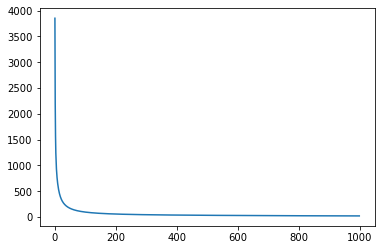

In [20]:
plt.plot(error_list)  

## Exercise 6.1

### Question 1

In a neural network with three input features, one hidden layer of 5 nodes and an output layer three possible values, what will be the dimensions of weight that connects input to hidden layer. Remember the dimensions of the input data is (m,3) where m is the number of records. 

A. [5,3]

B. [3,5]

C. [4,5]

D. [5,4]

Answer: B 

### Question 2

Which activation function do you use in the output layer in case of multiclass classification problems:

A. Sigmoid

B. Negative log likelihood

C. Relu

D. Softmax

Answer: D

### Question 3

Neural networks with hidden layers are capable of finding:

A. Linear Boundaries

B. Non-linear Boundaries

C. All of the above

D. None of the Above

Answer: C


## Excercise 6.2

Try to classify the following dataset with three classes by implementing multi-class classification neural network from scratch in Python

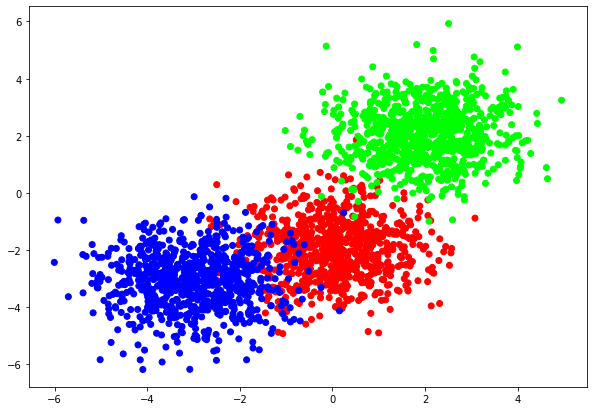

In [21]:
import numpy as np  
import matplotlib.pyplot as plt  

np.random.seed(42)  

cat1 = np.random.randn(800, 2) + np.array([0, -2])  
cat2 = np.random.randn(800, 2) + np.array([2, 2])  
cat3 = np.random.randn(800, 2) + np.array([-3, -3])  

X = np.vstack([cat1, cat2, cat3])  

labels = np.array([0]*800 + [1]*800 + [2]*800)  

y = np.zeros((2400, 3))  

for i in range(2400):  
    y[i, labels[i]] = 1  

x1 = X[:,0]  
x2 = X[:,1]  

plt.figure(figsize=(10,7))  
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)  


In [22]:
def define_parameters(weights):
    weight_list = []
    bias_list = []
    for i in range(len(weights) - 1):
        
        w = np.random.randn(weights[i], weights[i+1])
        b = np.random.randn()

        weight_list.append(w)
        bias_list.append(b)
    
    return weight_list, bias_list

def softmax(X):
    expX = np.exp(X)
    return expX / expX.sum(axis=1, keepdims=True)

def sigmoid(x):
    return 1/(1+np.exp(-x))


def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))


def predictions(w, b, X):
    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = softmax(zo)
    return ao


def find_cost(ao,y):
 
    total_cost = np.sum(-y * np.log(ao))
    return total_cost

def find_derivatives(w, b, X):

    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = softmax(zo)

    # Back propagation phase 1


    dcost_dzo = (ao-y)
    dzo_dwo = ah.T
   
    dwo =  np.dot(dzo_dwo,  dcost_dzo)
    dbo = np.sum(dcost_dzo)
    
    # Back propagation phase 2
    
    # dcost_wh = dcost_dah * dah_dzh * dzh_dwh
    # dcost_dah = dcost_dzo * dzo_dah

  
    dzo_dah = w[1].T

    dcost_dah = np.dot(dcost_dzo ,  dzo_dah)

    dah_dzh = sigmoid_der(zh) 
    dzh_dwh = X.T
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
    dbh = np.sum(dah_dzh * dcost_dah)

    return dwh, dbh, dwo, dbo

def update_weights(w,b,dwh, dbh, dwo, dbo, lr):
    w[0] = w[0] - lr * dwh
    w[1] = w[1] - lr * dwo

    b[0] = b[0] - lr * dbh
    b[1] = b[1] - lr * dbo

    return w, b

def my_multiout_neural_network(X, y, lr, epochs):
    error_list = []
    input_len = X.shape[1]
    output_len = y.shape[1]
    w,b = define_parameters([input_len, 10, output_len])

    for i in range(epochs):
        ao = predictions(w, b, X)
        cost = find_cost(ao, y)
        error_list.append(cost)
        dwh, dbh, dwo, dbo = find_derivatives (w, b, X)
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo,  lr )
        if i % 50 == 0 :
            print(cost)
            
    return w, b, error_list


lr = 0.005
epochs = 1000
w, b, error_list = my_multiout_neural_network(X,y,lr,epochs)


5705.350278643759
1028.9711294535737
1010.0543751874982
1003.631598457035
999.2200731812137
995.5020422233416
992.0835439374082
988.6394947578028
984.588744902979
2754.2358266554697
422.74827469122494
365.2988181638677
444.6207383557204
424.58457620979163
418.6482443781187
414.90889375994146
412.52366178829345
411.0061216278183
409.9674779270946
409.0352918569092
